In [1]:
import numpy.random as rd
from math import *
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Suites de Pile ou Face

On va considérer ici une propriété particulière des suites de Pile ou Face, qui pourra paraître contre-intuitive. La question est la suivante: si l'on effectue 100 Pile ou Face, est-il plus "normal" (c'est-à-dire probable) d'obtenir à un moment au moins $8$ Pile ou $8$ Face consécutifs ou de n'obtenir au maximum "que" 5 Pile ou 5 Face consécutifs?

Commençons par écrire un programme qui affiche un nombre $n$ Pile ou Face. On rappelle que random( ) génère une variable aléatoire de loi $\mathcal{U}(0,1)$: avoir random( )<0.5 constitue donc un succès, que l'on interprète comme le fait d'obtenir un Pile.

In [2]:
n=200
for i in range(n):
    if rd.random()<0.5:
        print('P', end=" ")
    else:
        print('F',end=" ")

P F P F F P P F F F P P P F F F F F F P F P F P P P F P F P F F F P F P F P F F F F F F F P F F F F P P F P F P P F P F P F F P P F F P P F P F P F F P F P P P P F F P P P F F F F F F P P P P P P P F F P F F F P F F P F P P F P F P F F F P F P P F F F F F P F F F F P P P P P P F P P P F P F P P F F P P P P P P F P F P P P F P P F F P F F P P F F P P P F F P P F F P P F F P F P P P P P F F P P F P 

## Longue suite de résultats égaux consécutifs

Passons dans le vif du sujet. Commençons par écrire un progamme qui crée la liste de tous les résultats de Pile ou Face jusqu'à $n$ lancers.

In [3]:
def PileFace(n):
    L=[]
    for i in range(n):
        if rd.random()<0.5:
            L.append('P')
        else:
            L.append('F')
    return L

In [4]:
print(PileFace(100))

['P', 'F', 'F', 'P', 'P', 'F', 'F', 'P', 'P', 'P', 'F', 'F', 'P', 'P', 'P', 'P', 'P', 'F', 'P', 'P', 'P', 'F', 'F', 'P', 'P', 'F', 'F', 'P', 'F', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'F', 'P', 'F', 'F', 'P', 'P', 'P', 'F', 'P', 'F', 'P', 'F', 'F', 'P', 'P', 'P', 'F', 'F', 'P', 'F', 'F', 'P', 'F', 'P', 'F', 'F', 'P', 'F', 'P', 'P', 'F', 'F', 'P', 'F', 'F', 'P', 'F', 'P', 'P', 'F', 'F', 'F', 'P', 'F', 'P', 'P', 'F', 'P', 'F', 'P', 'F', 'P', 'F', 'F', 'P', 'P', 'P', 'P', 'F', 'F', 'F', 'P', 'P', 'F']


La partie difficile consiste alors à écrire un programme qui identifie la longueur maximale (le record) de Pile ou de Face consécutifs dans une suite de Pile ou Face donnée. 
Le principe est de parcourir la liste, en mettant à jour plusieurs variables au fur et à mesure (la longueur du 'record en cours', la valeur du record absolu, l'élément de la liste auquel comparer le suivant).

In [5]:
def Record(Liste):
    l=1          ### l est la longueur du 'record en cours' (le nombre de résultats consécutifs en cours)
    debut=0      ### on garde en mémoire l'endroit ou commence le record
    rec=1        ### rec est la valeur du record absolu jusqu'à l'endroit où l'on est dans la liste
    x=Liste[0]   ### x est la valeur de l'élément de la liste à l'endroit où l'on est dans la liste 
    for i in range(1,len(Liste)):
        y=Liste[i]
        if y==x:    ## si l'élément est égal au précédent, on augmente la longueur du 'record en cours'
            l=l+1
        else:
            l=1
        if l>rec:   ## si la longueur du 'record en cours' est plus grande que le record absolu
            rec=l   ## on met à jour le record
            debut=i-rec+1
        x=y
    return debut,rec  ## la position initiale du record permettra de l'afficher dans la liste, voir plus bas

Voilà un programme qui renvoie le nombre maximal de Pile ou de Face consécutifs dans 10 suites de $n=100$ Pile ou Face.
Vous pouvez changez la valeur de $n$, et vous pouvez exécuter plusieurs fois la cellule pour obtenir des suites de Pile ou Face différentes.

In [6]:
n=100
for i in range(10):
    Liste=PileFace(n)
    print("Il y a eu {} résultats égaux consécutifs (n={})".format(Record(Liste)[1],n))

Il y a eu 6 résultats égaux consécutifs (n=100)
Il y a eu 6 résultats égaux consécutifs (n=100)
Il y a eu 6 résultats égaux consécutifs (n=100)
Il y a eu 8 résultats égaux consécutifs (n=100)
Il y a eu 6 résultats égaux consécutifs (n=100)
Il y a eu 4 résultats égaux consécutifs (n=100)
Il y a eu 6 résultats égaux consécutifs (n=100)
Il y a eu 7 résultats égaux consécutifs (n=100)
Il y a eu 7 résultats égaux consécutifs (n=100)
Il y a eu 7 résultats égaux consécutifs (n=100)


Le programme suivant permet de visualiser la suite de Pile ou Face et le 'record' de résultats égaux consécutifs.
Vous pouvez exécuter de nouveau la cellule pour obtenir une suite de Pile ou Face différente.

In [7]:
n_max=1000
Liste=PileFace(n_max)
def AfficheListe(n):
    indice,record=Record(Liste[:n])
    for i in range(indice):
        print(Liste[i],end=" ")
    for i in range(indice,indice+record):
        print('\033[1m' +"\033[1;31m"  + Liste[i] + "\033[0;0m", end=" ")
    for i in range(indice+record,len(Liste[:n])):
        print(Liste[i],end=" ")
    print()
    print()
    print("Il y a une suite de {} résultats égaux consécutifs, qui commence à l'indice {}".format(record,indice+1))

widgets.interact(AfficheListe,n=widgets.IntSlider(value=100,min=10,max=n_max,step=1))

interactive(children=(IntSlider(value=100, description='n', max=1000, min=10), Output()), _dom_classes=('widge…

<function __main__.AfficheListe(n)>

## Quelle est la probabilité d'obtenir au moins $8$ Pile ou $8$ Face consécutifs?

Écrivons un programme qui est plus rapide: il crée la liste de Pile ou Face au fur et à mesure qu'il la parcourt pour déterminer le nombre maximal de résultat égaux consécutifs. Longueur(n) renvoie le nombre maximal de résultats égaux consécutifs dans une suite de $n$ Pile ou Face (sans se préoccuper de à quoi ressemble exactement la suite).

Autrement dit, le programme suivant génère une variable aléatoire

$$L_n  =  \text{"le nombre maximal de résultats égaux consécutifs dans une suite de $n$ Pile ou Face"}.$$

In [8]:
def Longueur(n):
    l=1
    rec=1
    for i in range(1,n):
        if rd.random()<0.5:
            l=l+1
        else:
            l=1
        if l>rec:
            rec=l
    return rec

On va se servir de ce programme pour créer un histogramme qui représente les fréquences observées
lors d'une grand nombre de répétitions ($k=10000$) de $n=100$ Pile ou Face.
Cela permet d'avoir une idée de la densité discrète de $L_n$. Vous pouvez changez la valeur de $n$ si vous voulez (attention à ne pas prendre $n$ trop grand non plus, sinon le temps de calcul sera très long!).

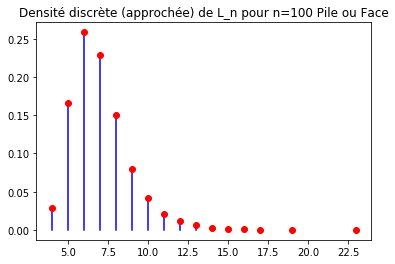

In [9]:
k=10000
n=100
from collections import Counter
compte=Counter([Longueur(n) for i in range(k)])

for i in sorted(compte):
    proba=compte[i]/k
    plt.plot([i,i],[0,proba],color='blue')
    plt.plot(i,proba,'o',color='red')
plt.title("Densité discrète (approchée) de L_n pour n={} Pile ou Face".format(n))
plt.show()

On remarque que pour $n=100$, la densité discrète $P(L_n=x)$ semble maximale pour $x=6$ (et vaut alors $P(L_n=6)\approx 0,26$), et  on a aussi $P(L_n=7)\approx 0,23$, $P(L_n=5)\approx 0,16$, $P(L_n=8)\approx 0,15$...

On peut reprendre les valeurs au-dessus pour estimer $P(L_n \leq 5)$ et $P(L_n \geq 8)$, et aussi $E(L_n)$

In [14]:
print("La probabilité d'avoir L_n:")
proba1=0
for i in sorted(compte):
    if i<=5:
        proba1 = proba1 + compte[i]/k
print(" * plus petit que 5 est approximativement {}".format(proba1))
proba2=0
for i in sorted(compte):
    if i>=8:
        proba2 = proba2 + compte[i]/k
print(" * plus grand que 8 est approximativement {}".format(proba2))
print()

moy=0
for i in sorted(compte):
    moy+=i*compte[i]/k
print("L'espérance de L_n est approximativement {}".format(moy))

La probabilité d'avoir L_n:
 * plus petit que 5 est approximativement 0.1949
 * plus grand que 8 est approximativement 0.3171

L'espérance de L_n est approximativement 6.9851


### Dépendance de l'histogramme en fonction de $n$

On modifie un peu les programmes précédents pour éviter de recalculer les records d'une même liste plusieurs fois. Par exemple, le programme Records renvoie toutes les valeurs de $(L_i)_{1\leq i \leq n}$ pour une suite de Pile ou Face de longueur $n$.

In [15]:
def Records(n):
    l=1
    rec=1
    records=[rec]
    for i in range(1,n):
        if rd.random()<0.5:
            l=l+1
        else:
            l=1
        if l>rec:
            rec=l
        records.append(rec)
    return records

#### Pour les petites valeurs de $n$

In [20]:
n_max=100     ### Nombre maximal de Pile ou Face considérés
k=1000        ### Nombre de répétition de l'expérience (qui consiste en n_max Pile ou Face!)
H=[Records(n_max) for i in range(k)]

from collections import Counter
def Histo(n):
    ListeRec=[H[i][n-1] for i in range(k)]
    compte=Counter(ListeRec)
    moy=0
    for i in sorted(compte):
        proba=compte[i]/k
        moy+=i*proba
        plt.plot([i,i],[0,proba],color='blue')
        plt.plot(i,proba,'o',color='red')
    plt.title("Densité discrète (approchée) de L_n pour n={} Pile ou Face; E(L_n) ≈ {}".format(n,round(moy,3)))

widgets.interact(Histo,n=widgets.IntSlider(value=1,min=1,max=100,step=1))

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

<function __main__.Histo(n)>

#### Pour les grandes valeurs de $n$

Attention, cela peut prendre un peu de temps.

In [21]:
n_max=10000   ### Nombre maximal de Pile ou Face considérés
k=1000        ### Nombre de répétition de l'expérience (qui consiste en n_max Pile ou Face!)
H2=[]
for i in range(k):
    R=Records(n_max)
    R2=[R[j*100-1] for j in range(1,int(n_max/100)+1)]
    H2.append(R2)

from collections import Counter
def Histo(n):
    m=int(n/100)
    ListeRec=[H2[i][m-1] for i in range(k)]
    compte=Counter(ListeRec)
    moy=0
    for i in sorted(compte):
        proba=compte[i]/k
        moy+=i*proba
        plt.plot([i,i],[0,proba],color='blue')
        plt.plot(i,proba,'o',color='red')
    plt.title("Densité discrète (approchée) de L_n pour n={} Pile ou Face; E(L_n) ≈ {}".format(n,round(moy,3)))

widgets.interact(Histo,n=widgets.IntSlider(value=100,min=100,max=n_max,step=100))

interactive(children=(IntSlider(value=100, description='n', max=10000, min=100, step=100), Output()), _dom_cla…

<function __main__.Histo(n)>